In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt #to put the heatmap
import seaborn as sns #to vizualise the data
from sklearn.model_selection import train_test_split #split to  train and test
from sklearn.linear_model import LinearRegression #creating the model
from sklearn.metrics import r2_score #to calculate the R and see how the determination coeficient is

In [2]:
db = pd.read_csv('/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv')
db

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [3]:
for column in db.columns:
    print('===='*30)
    print (db[column].value_counts())

SquareFeet
2486    43
1897    41
2946    40
2573    40
1398    40
        ..
1019    12
1635    12
2330    12
2087    11
1828    10
Name: count, Length: 2000, dtype: int64
Bedrooms
3    12661
5    12468
2    12436
4    12435
Name: count, dtype: int64
Bathrooms
1    16755
2    16719
3    16526
Name: count, dtype: int64
Neighborhood
Suburb    16721
Rural     16676
Urban     16603
Name: count, dtype: int64
YearBuilt
1968    777
1977    742
1983    741
1967    729
1999    728
       ... 
1950    643
2016    642
2006    640
2012    638
2001    621
Name: count, Length: 72, dtype: int64
Price
215355.283618    1
153636.537671    1
229477.752136    1
335187.076704    1
130369.813111    1
                ..
248908.682853    1
102723.154923    1
350297.654683    1
68521.596847     1
221618.583218    1
Name: count, Length: 50000, dtype: int64


In [4]:
db1 = pd.get_dummies(db, columns = ['Neighborhood'],
                    prefix = 'C')
db1

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,C_Rural,C_Suburb,C_Urban
0,2126,4,1,1969,215355.283618,True,False,False
1,2459,3,2,1980,195014.221626,True,False,False
2,1860,2,1,1970,306891.012076,False,True,False
3,2294,2,1,1996,206786.787153,False,False,True
4,2130,5,2,2001,272436.239065,False,True,False
...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895,True,False,False
49996,2854,2,2,1988,374507.656727,False,True,False
49997,2979,5,3,1962,384110.555590,False,True,False
49998,2596,5,2,1984,380512.685957,True,False,False


In [5]:
correlation = db1.corr()
correlation

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,C_Rural,C_Suburb,C_Urban
SquareFeet,1.000000,-0.002638,-0.003275,0.000482,0.750720,-0.005843,-0.007665,0.013528
Bedrooms,-0.002638,1.000000,0.007405,0.003147,0.072624,0.005156,-0.003029,-0.002127
Bathrooms,-0.003275,0.007405,1.000000,0.003748,0.028418,-0.003672,0.004551,-0.000883
YearBuilt,0.000482,0.003147,0.003748,1.000000,-0.002288,-0.001747,0.003793,-0.002051
Price,0.750720,0.072624,0.028418,-0.002288,1.000000,-0.006793,-0.014831,0.021658
C_Rural,-0.005843,0.005156,-0.003672,-0.001747,-0.006793,1.000000,-0.501434,-0.498778
C_Suburb,-0.007665,-0.003029,0.004551,0.003793,-0.014831,-0.501434,1.000000,-0.499788
C_Urban,0.013528,-0.002127,-0.000883,-0.002051,0.021658,-0.498778,-0.499788,1.000000


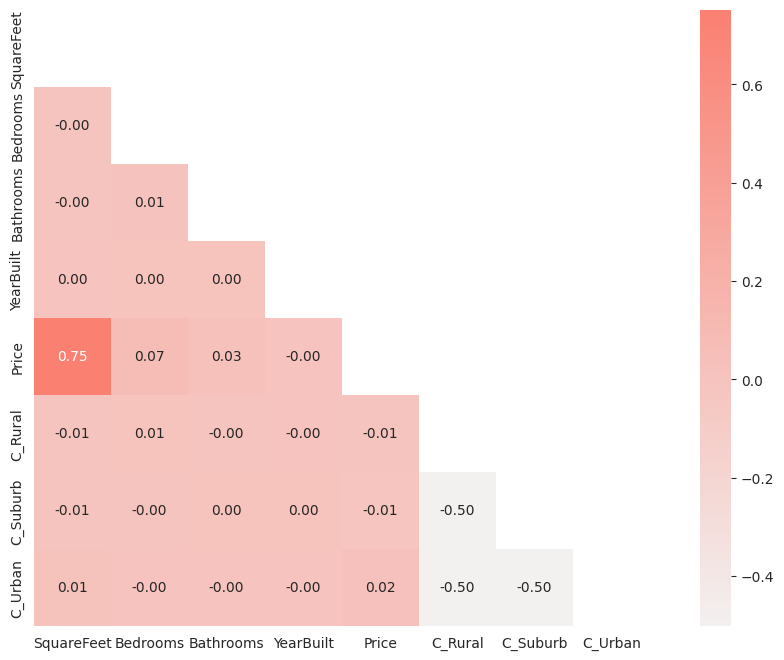

In [6]:
colors = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(13,8))
    ax = sns.heatmap(correlation, cmap = colors, mask=mask, square=True, fmt='.2f', annot = True)

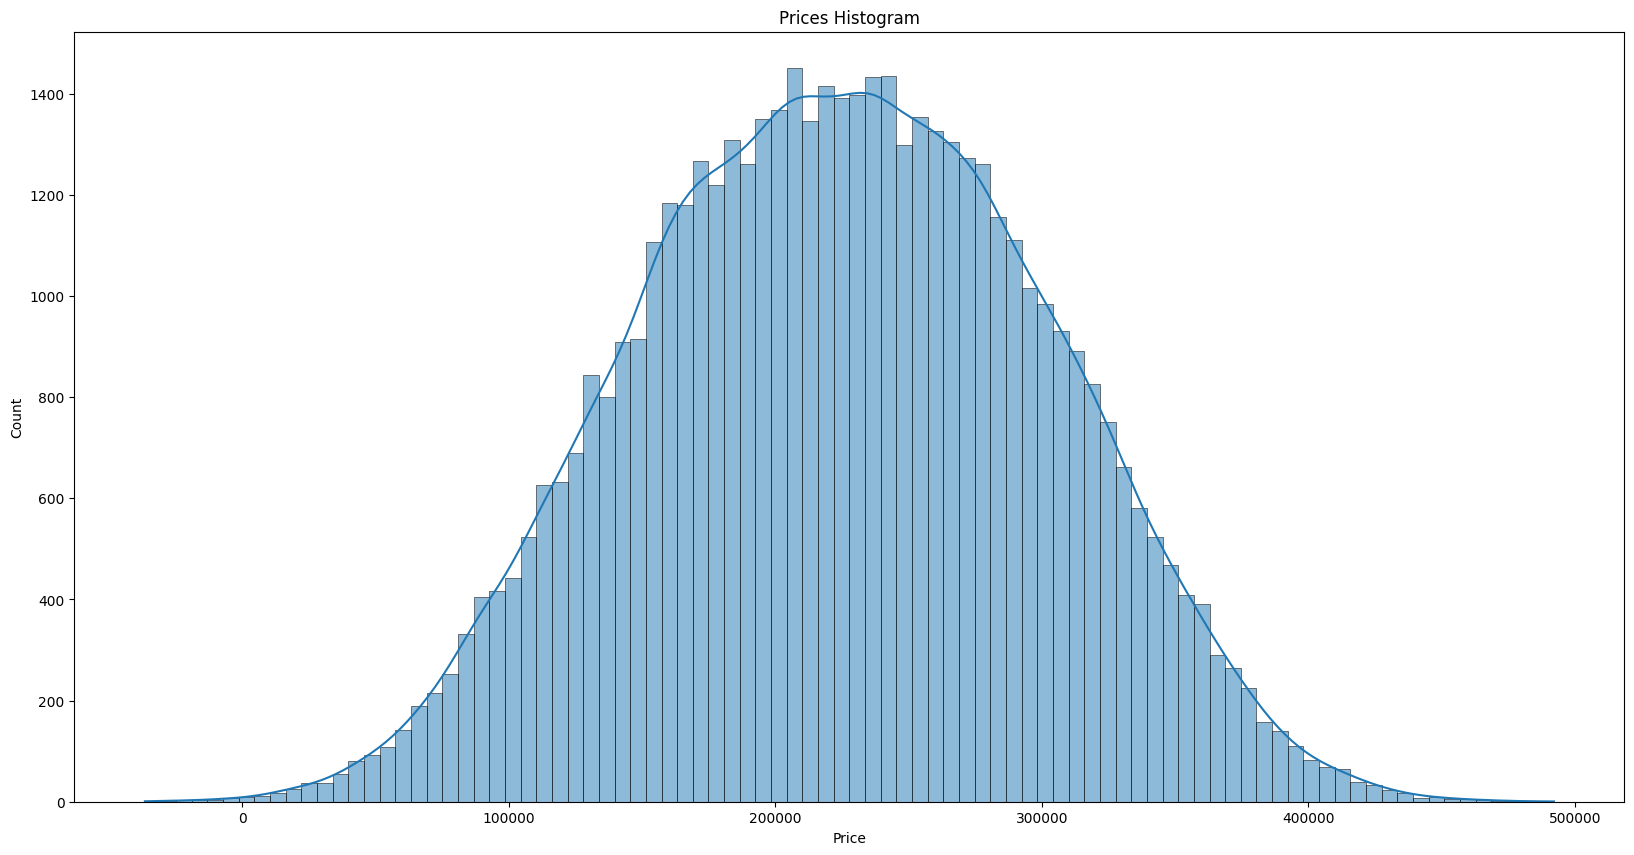

In [7]:
ax = sns.histplot(data = db1, x= "Price", kde = True)
ax.figure.set_size_inches(20,10)
ax.set_title("Prices Histogram")
ax.set_xlabel('Price');

#  **Linear Regression**

In [8]:
#independent variables
X = db1.drop('Price', axis = 1)

#dependent variable
y = db1['Price']

In [9]:
#division of train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [10]:
#creating an instance
lr = LinearRegression()

In [11]:
#train
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
#test
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [13]:
r2_lr = r2_score(y_test,y_pred_test)
r2_lr

0.5729781112210486

In [14]:
#test
db1['prediction'] = np.hstack([y_pred_train, y_pred_test])
db1

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,C_Rural,C_Suburb,C_Urban,prediction
0,2126,4,1,1969,215355.283618,True,False,False,181824.122849
1,2459,3,2,1980,195014.221626,True,False,False,224881.607672
2,1860,2,1,1970,306891.012076,False,True,False,169437.274051
3,2294,2,1,1996,206786.787153,False,False,True,161670.823621
4,2130,5,2,2001,272436.239065,False,True,False,196693.579129
...,...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895,True,False,False,283495.784367
49996,2854,2,2,1988,374507.656727,False,True,False,140691.041653
49997,2979,5,3,1962,384110.555590,False,True,False,314300.100198
49998,2596,5,2,1984,380512.685957,True,False,False,163125.915362


In [15]:
db1['error'] =  db1['Price'] - db1['prediction'] 
db1

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,C_Rural,C_Suburb,C_Urban,prediction,error
0,2126,4,1,1969,215355.283618,True,False,False,181824.122849,33531.160769
1,2459,3,2,1980,195014.221626,True,False,False,224881.607672,-29867.386046
2,1860,2,1,1970,306891.012076,False,True,False,169437.274051,137453.738025
3,2294,2,1,1996,206786.787153,False,False,True,161670.823621,45115.963532
4,2130,5,2,2001,272436.239065,False,True,False,196693.579129,75742.659936
...,...,...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895,True,False,False,283495.784367,-183414.918472
49996,2854,2,2,1988,374507.656727,False,True,False,140691.041653,233816.615074
49997,2979,5,3,1962,384110.555590,False,True,False,314300.100198,69810.455392
49998,2596,5,2,1984,380512.685957,True,False,False,163125.915362,217386.770595


# **Decision Tree**

In [16]:
#importing the decision tree for regression (non categorical data)
from sklearn.tree import DecisionTreeRegressor

In [17]:
#instance the model
dtr = DecisionTreeRegressor(random_state = 42,max_depth=5)


In [18]:
#train
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [19]:
#test
predict_dtr = dtr.predict(X_test)
predict_dtr

array([222839.12179687, 132684.41975929, 246641.23597738, ...,
       310858.21247737, 161095.99736179, 227807.79942599])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


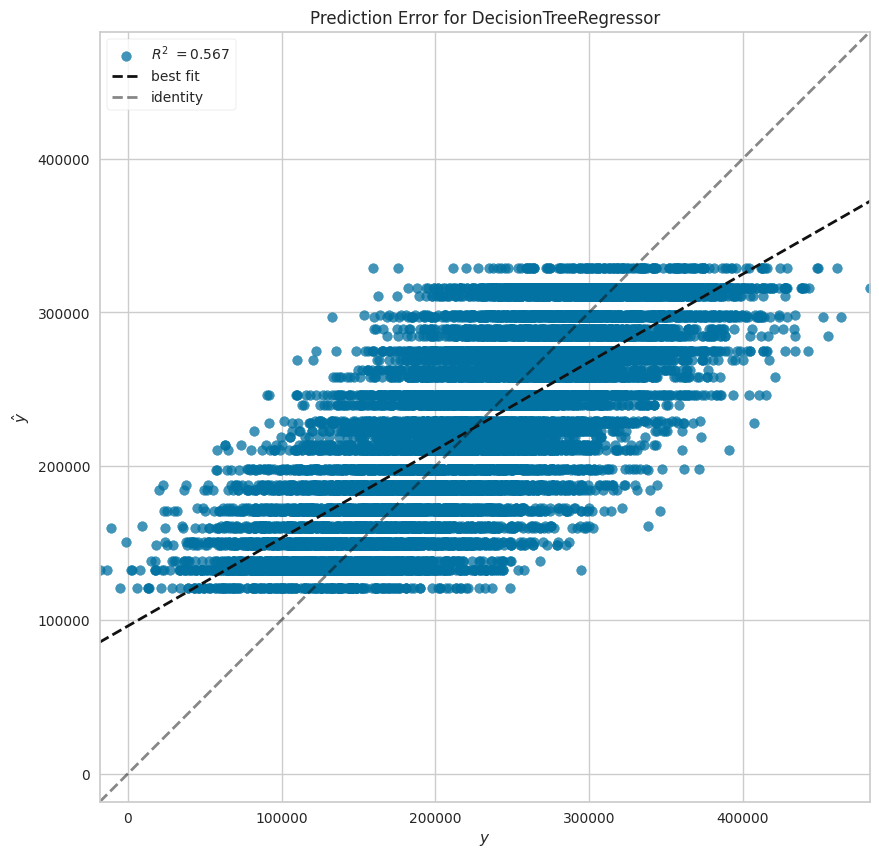

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [20]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize = (10,10))
pev = PredictionError(dtr)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

In [21]:
r2_dtr = r2_score(y_test, predict_dtr)
r2_dtr

0.5674239406955558

# **Random Forest**
* Reduces overfitting
* Deals ok with missing data (flexibility)
* good accuracy
* Good to work with big volume of data

n_estimators: quantity of trees on the forest



In [22]:
from sklearn.ensemble import RandomForestRegressor


In [23]:
rf = RandomForestRegressor(random_state=42,max_depth= 5, n_estimators =10)

In [24]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [25]:
predict_rf = rf.predict(X_test)
predict_rf

array([215791.88236788, 126864.06948144, 248459.0580536 , ...,
       308983.13968116, 164515.66075631, 225783.18815431])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


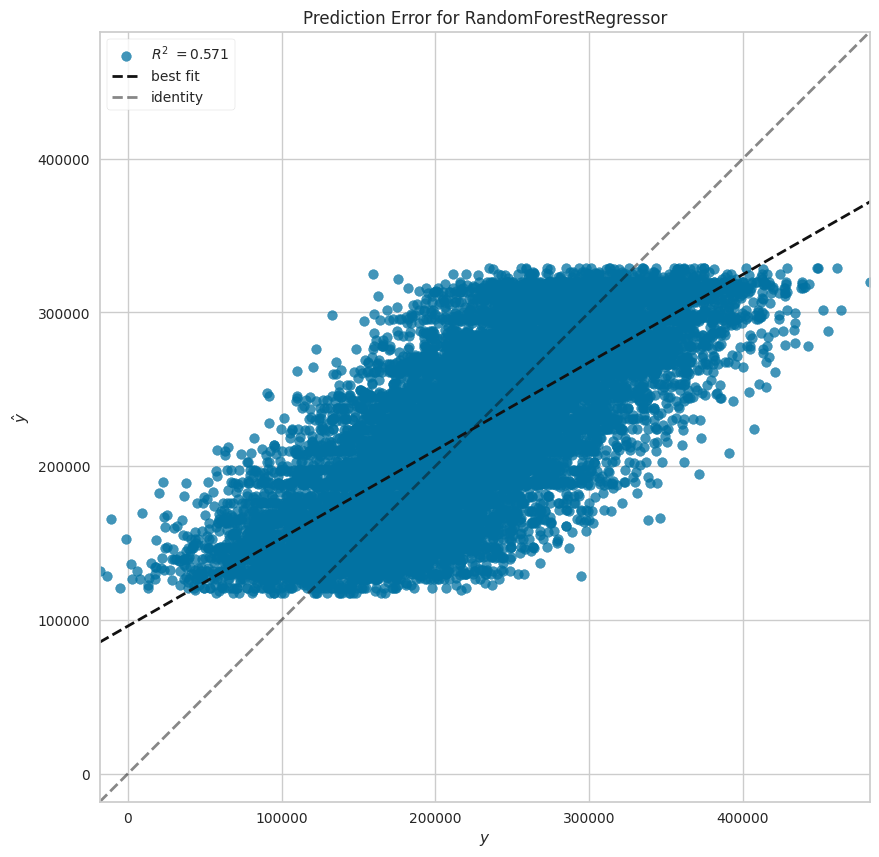

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [26]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize = (10,10))
pev = PredictionError(rf)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

In [27]:
#coefficient of determination
r2_rf = r2_score(y_test, predict_rf)
r2_rf

0.5706695876734444

# Comparing the three models

In [28]:
#comparing

# Importando os métodos que serão utilizados
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [29]:
def obtain_metric(model, X_test, y_test, db1):
    predict = model.predict(X_test)
    df_metrics = pd.DataFrame({
        'R2': [r2_score(y_test,predict)],
        'MSE': [mean_squared_error(y_test, predict)],
        'MAE': [mean_absolute_error(y_test, predict)]
    }, index=[db1])

    return df_metrics

In [30]:
def tabel_metrics(modelo_reg_linear, modelo_dt, modelo_rf, X_test, y_test):
    df_metricas_reg_linear = obtain_metric(modelo_reg_linear, X_test, y_test, 'Linear Regression')
    df_metricas_dt = obtain_metric(modelo_dt, X_test, y_test, 'Decision Tree Regression')
    df_metricas_rf = obtain_metric(modelo_rf, X_test, y_test, 'Random Forest Regression')

    return pd.concat([df_metricas_reg_linear, df_metricas_dt, df_metricas_rf])


In [31]:
tabel_metrics(lr, dtr, rf, X_test, y_test)

,R2,MSE,MAE
Linear Regression,0.572978,2.467994e+09,39737.931020
Decision Tree Regression,0.567424,2.500095e+09,39945.414315
Random Forest Regression,0.570670,2.481336e+09,39814.649823


# Optmizing the Decision Tree


In [32]:
from sklearn.model_selection import KFold

#defining the K number of layers
cv = KFold(n_splits = 5, shuffle=True)

Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
cross_val_r2_performance = cross_val_score(estimator = dtr,
                                          X = X_train,
                                          y = y_train,
                                          scoring = 'r2',
                                          cv = cv)
print('r2 performance:{}'.format(round(cross_val_r2_performance.mean(),3)))

r2 performance:0.563


# Random Search Validation

In [35]:
#hiperparameters selection
param_random_dt = {
    'criterion':['squared_error', 'absolut_error'],
    'max_depth':[6,8,10,12,14,16],
    'min_samples_leaf':[6,8,10],
    'min_samples_split':[8,10,12,14,16],
    'max_features':['sqrt','log2', 'auto'],
        }

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
random_cv_dt = RandomizedSearchCV(
dtr,
param_random_dt,
n_iter = 5,
cv = cv,
scoring = 'r2',
n_jobs = -1
)

In [38]:
randomcv_dtr = random_cv_dt.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/si

In [39]:
pd.DataFrame(randomcv_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002870,0.000366,0.000000,0.000000,12,6,sqrt,14,absolut_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,0.016622,0.000487,0.003180,0.000198,8,6,log2,6,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 6...",0.373350,0.376239,0.353179,0.403425,0.370154,0.375269,0.016196,2
2,0.002223,0.000221,0.000000,0.000000,14,6,log2,16,absolut_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,0.002217,0.000229,0.000000,0.000000,12,10,log2,12,absolut_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,0.053270,0.003377,0.003063,0.000414,14,8,auto,8,squared_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.558144,0.563305,0.540803,0.540572,0.560973,0.552759,0.009991,1


In [40]:
#best combination
randomcv_dtr.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 8,
 'criterion': 'squared_error'}

In [41]:
#best score
randomcv_dtr.best_score_

0.5527592865442292

# Random Search Test

In [42]:
dtr_optmized = DecisionTreeRegressor(criterion= 'squared_error',
                                     max_depth = 10,
                                     max_features = 'auto',
                                    min_samples_leaf = 8,
                                     min_samples_split = 8)

In [43]:
dtr_optmized.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=8,
                      min_samples_split=8)

In [44]:
optmized_dtr_prediction = dtr_optmized.predict(X_test)

In [45]:
r2_score(y_test, optmized_dtr_prediction)

0.5363399837663958

# Optmizing the Random Forest

#  Cross Validation

In [46]:
RF_cross_val_performance = cross_val_score(estimator =rf,
                                          X = X_train,
                                          y = y_train,
                                          scoring = 'r2',
                                          cv= cv)
print('R2 medium performance:{}'.format(round(RF_cross_val_performance.mean(),3)))

R2 medium performance:0.565


In [47]:
#n_estimators is the number of trees in a forest
param_random_rf = {
    'n_estimators': [150,200],
    'max_depth':[20,30],
    'min_samples_split': [8,10],
    'min_samples_leaf': [3],
}

In [48]:
#
random_cv_rf = RandomizedSearchCV(
rf,
param_random_rf,
n_iter = 5,
cv = cv,
scoring = 'r2',
n_jobs =-1,
random_state = 42
)

In [49]:
rf_randomcv = random_cv_rf.fit(X_train, y_train)

In [50]:
pd.DataFrame(rf_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.755964,0.085684,0.338763,0.051542,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.540328,0.535415,0.533572,0.547419,0.541222,0.539591,0.004861,3
1,12.662702,0.151696,0.281939,0.003527,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.539430,0.534463,0.532474,0.546744,0.540277,0.538678,0.004989,5
2,9.516984,0.172277,0.205138,0.005929,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.539822,0.534748,0.532616,0.547162,0.541037,0.539077,0.005104,4
3,12.314962,0.179926,0.264387,0.004083,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.542586,0.537927,0.535854,0.549112,0.543177,0.541731,0.004611,2
4,8.711924,0.488294,0.185734,0.012151,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.542852,0.538064,0.535678,0.549309,0.543648,0.541910,0.004739,1


In [51]:
rf_randomcv.best_params_

{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 20}

In [52]:
rf_randomcv.best_score_

0.5419103370136684

# Random Search Test

In [53]:
rf_optmized2 = RandomForestRegressor(random_state = 42, max_depth = 20,
                                    n_estimators = 150,
                                    min_samples_leaf = 3,
                                    min_samples_split = 10)

In [54]:
rf_optmized2.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=150, random_state=42)

In [55]:
predict_rf_optmized2 = rf_optmized2.predict(X_test)

In [56]:
r2_score(y_test, predict_rf_optmized2)

0.5429396257940076

# Choosing the best Result

In [57]:
print('Random Search')
print('='*30)
print('Decision Tree: %f'%r2_score(y_test,optmized_dtr_prediction))
print('Random forest: %f'% r2_score(y_test,predict_rf_optmized2))
print('*'*30)

print('Cross Validation')
print('='*30)
print("Decision Tree: %f" %round(cross_val_r2_performance.mean(),3))
print('Random Forest: %f'%round(RF_cross_val_performance.mean(),3))


Random Search
Decision Tree: 0.536340
Random forest: 0.542940
******************************
Cross Validation
Decision Tree: 0.563000
Random Forest: 0.565000
